In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
'/content/drive/MyDrive/AI Powered Debate System Dataset'

'/content/drive/MyDrive/AI Powered Debate System Dataset'

In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/AI Powered Debate System Dataset/People Opinion Dataset 1L.csv'
df = pd.read_csv(file_path)

# Quick check
print("Dataset loaded. Shape:", df.shape)
df.head()

Dataset loaded. Shape: (107015, 5)


,Topic,Subtopic,PeoplePointOfView,Sentiment,EngagementScore
0,NaN,NaN,NaN,NaN,NaN
1,Social Issues,Women Rights,Equal pay for equal work must be implemented. ...,Positive,325.0
2,Politics,Other,Smaller parties also play a big role in democr...,Neutral,1324.0
3,Religion,Hinduism,I feel proud following Hinduism because it res...,Positive,727.0
4,Religion,Christianity,Christian teachings of love and kindness inspi...,Negative,696.0


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/drive/MyDrive/AI Powered Debate System Dataset/People Opinion Dataset 1L.csv")
df.head()

,Topic,Subtopic,PeoplePointOfView,Sentiment,EngagementScore
0,NaN,NaN,NaN,NaN,NaN
1,Social Issues,Women Rights,Equal pay for equal work must be implemented. ...,Positive,325.0
2,Politics,Other,Smaller parties also play a big role in democr...,Neutral,1324.0
3,Religion,Hinduism,I feel proud following Hinduism because it res...,Positive,727.0
4,Religion,Christianity,Christian teachings of love and kindness inspi...,Negative,696.0


In [6]:
df.tail()

,Topic,Subtopic,PeoplePointOfView,Sentiment,EngagementScore
107010,Social Issues,Women Rights,Women empowerment is key for India’s progress....,Neutral,1372.0
107011,Social Issues,Education,Education is the foundation of development. (new),Negative,945.0
107012,Religion,Hinduism,Believing in God gives me hope.,Positive,1148.0
107013,Existence of God,Theism,Believing in God gives me hope. (update),Neutral,835.0
107014,Politics,Congress,"Congress gave us RTI and MGNREGA, which direct...",Negative,716.0


In [7]:
#Data Cleaning

In [8]:
df.shape

(107015, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107015 entries, 0 to 107014
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Topic              103773 non-null  object 
 1   Subtopic           103773 non-null  object 
 2   PeoplePointOfView  103773 non-null  object 
 3   Sentiment          103773 non-null  object 
 4   EngagementScore    103773 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.1+ MB


In [10]:
df.isnull().sum()

,0
Topic,3242
Subtopic,3242
PeoplePointOfView,3242
Sentiment,3242
EngagementScore,3242


In [11]:
df = df.dropna().reset_index(drop=True)

In [12]:
df.shape

(103773, 5)

In [13]:
 df.duplicated().sum()

np.int64(7528)

In [14]:
df = df.drop_duplicates().reset_index(drop=True)

In [15]:
df.shape

(96245, 5)

In [16]:
#Data PreProcessing

In [17]:
text_columns = ["Topic", "Subtopic", "PeoplePointOfView", "Sentiment"]
for col in text_columns:
    df[col] = df[col].str.strip()

In [18]:
df["EngagementScore"] = pd.to_numeric(df["EngagementScore"], errors="coerce")

In [19]:
df["EngagementScore"].head()

,EngagementScore
0,325.0
1,1324.0
2,727.0
3,696.0
4,332.0


In [20]:
df = df[(df["EngagementScore"] >= 300) & (df["EngagementScore"] <= 1500)].reset_index(drop=True)

In [21]:
df.shape

(94195, 5)

In [22]:
df.head()

,Topic,Subtopic,PeoplePointOfView,Sentiment,EngagementScore
0,Social Issues,Women Rights,Equal pay for equal work must be implemented. ...,Positive,325.0
1,Politics,Other,Smaller parties also play a big role in democr...,Neutral,1324.0
2,Religion,Hinduism,I feel proud following Hinduism because it res...,Positive,727.0
3,Religion,Christianity,Christian teachings of love and kindness inspi...,Negative,696.0
4,Politics,AAP,AAP promotes transparency in governance. (update),Positive,332.0


In [23]:
X = df['PeoplePointOfView']
y = df['Topic']

In [24]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("\nLabel Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Label Mapping: {'Existence of God': np.int64(0), 'Politics': np.int64(1), 'Religion': np.int64(2), 'Social Issues': np.int64(3)}


In [25]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
print("\nData cleaning & preprocessing completed successfully!")
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Data cleaning & preprocessing completed successfully!
Training Data Shape: (75356, 159)
Testing Data Shape: (18839, 159)


In [28]:
# Exploratory Data Analysis (EDA) & Feature Engineering

In [29]:
print("Dataset Shape:", df.shape)
print("\nClass Distribution:\n", df['Topic'].value_counts())

Dataset Shape: (94195, 5)

Class Distribution:
 Topic
Politics            24141
Social Issues       23761
Religion            23278
Existence of God    23015
Name: count, dtype: int64


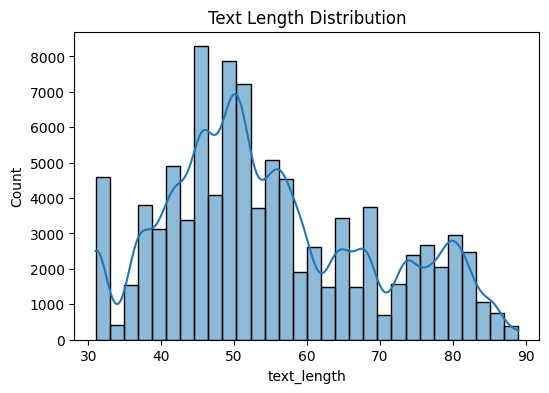

In [30]:
df['text_length'] = df['PeoplePointOfView'].apply(len)

plt.figure(figsize=(6,4))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.show()

In [31]:
df['word_count'] = df['PeoplePointOfView'].apply(lambda x: len(str(x).split()))
print(df[['PeoplePointOfView', 'word_count']].head())

                                   PeoplePointOfView  word_count
0  Equal pay for equal work must be implemented. ...           9
1  Smaller parties also play a big role in democr...          10
2  I feel proud following Hinduism because it res...          12
3  Christian teachings of love and kindness inspi...           9
4  AAP promotes transparency in governance. (update)           6


In [32]:
df['review_length'] = df['PeoplePointOfView'].apply(lambda x: len(str(x).split()))
print(df[['PeoplePointOfView', 'review_length']].head())

                                   PeoplePointOfView  review_length
0  Equal pay for equal work must be implemented. ...              9
1  Smaller parties also play a big role in democr...             10
2  I feel proud following Hinduism because it res...             12
3  Christian teachings of love and kindness inspi...              9
4  AAP promotes transparency in governance. (update)              6


In [33]:
df['sentence_length'] = df['PeoplePointOfView'].apply(lambda x: len(str(x).split('.')))
print(df[['PeoplePointOfView', 'sentence_length']].head())

                                   PeoplePointOfView  sentence_length
0  Equal pay for equal work must be implemented. ...                2
1  Smaller parties also play a big role in democr...                2
2  I feel proud following Hinduism because it res...                2
3  Christian teachings of love and kindness inspi...                2
4  AAP promotes transparency in governance. (update)                2


In [34]:
df['Topic'].value_counts()

,count
Topic,
Politics,24141
Social Issues,23761
Religion,23278
Existence of God,23015


In [35]:
df['Topic'].value_counts()/df.shape[0]*100

,count
Topic,
Politics,25.628749
Social Issues,25.225330
Religion,24.712564
Existence of God,24.433356


<function matplotlib.pyplot.show(close=None, block=None)>

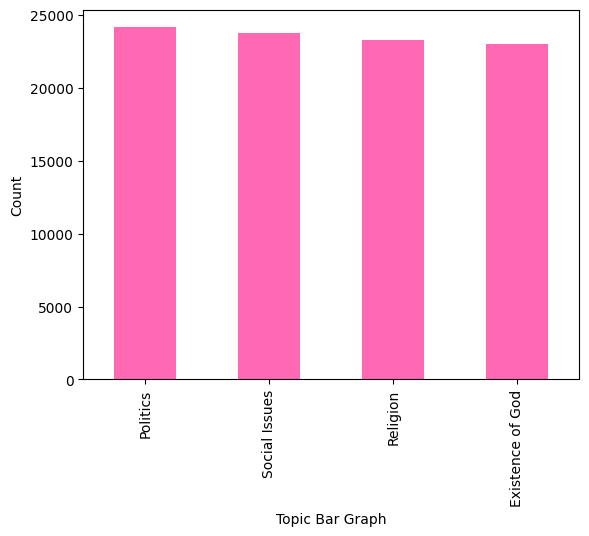

In [36]:
df['Topic'].value_counts().plot.bar(color = 'hotpink')
plt.xlabel('Topic Bar Graph')
plt.ylabel('Count')
plt.show

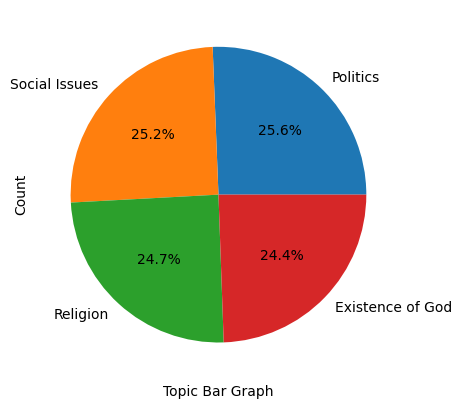

In [37]:
df['Topic'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel('Topic Bar Graph')
plt.ylabel('Count')
plt.show()

In [38]:
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,32086
Negative,31213
Neutral,30896


In [39]:
df['Sentiment'].value_counts()/df.shape[0]*100

,count
Sentiment,
Positive,34.063379
Negative,33.136578
Neutral,32.800042


In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
df['PeoplePointOfView'] = df['PeoplePointOfView'].str.lower()

In [42]:
df['PeoplePointOfView'].head()

,PeoplePointOfView
0,equal pay for equal work must be implemented. ...
1,smaller parties also play a big role in democr...
2,i feel proud following hinduism because it res...
3,christian teachings of love and kindness inspi...
4,aap promotes transparency in governance. (update)


In [43]:
from wordcloud import WordCloud

In [44]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')

In [45]:
Existence_of_God_topic= wc.generate(df[df['Topic'] == 'Existence of God']['PeoplePointOfView'].str.cat(sep = " "))

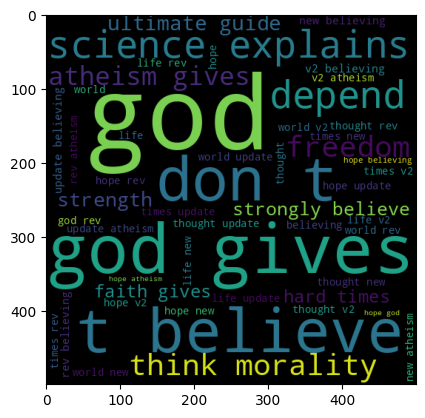

In [46]:
plt.imshow(Existence_of_God_topic)

In [47]:
Politics_topic= wc.generate(df[df['Topic'] == 'Politics']['PeoplePointOfView'].str.cat(sep = " "))

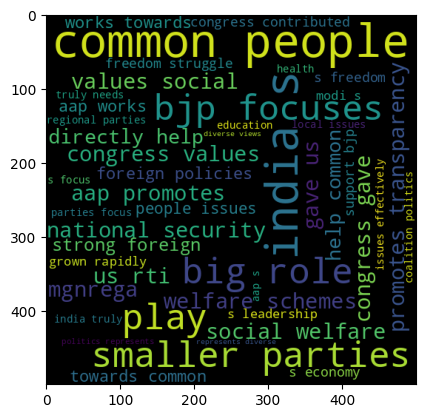

In [48]:
plt.imshow(Politics_topic)

In [49]:
Religion_topic= wc.generate(df[df['Topic'] == 'Religion']['PeoplePointOfView'].str.cat(sep = " "))

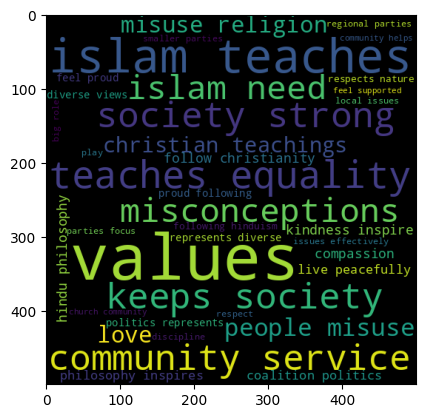

In [50]:
plt.imshow(Religion_topic)

In [51]:
Social_Issues_topic= wc.generate(df[df['Topic'] == 'Social Issues']['PeoplePointOfView'].str.cat(sep = " "))

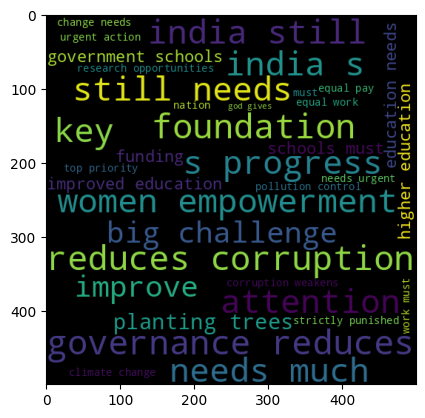

In [52]:
plt.imshow(Social_Issues_topic)

In [53]:
!pip install gensim
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 88.5 MB/s eta 0:00:00


In [54]:
# Tokenization
tokenized = df['PeoplePointOfView'].astype(str).apply(lambda x: x.lower().split())

# Train Word2Vec
w2v_model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=1, workers=4)

# Convert sentence to average word vector
def get_vector(sentence):
    words = sentence.lower().split()
    vectors = [w2v_model.wv[w] for w in words if w in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

# Vector features
X = np.array([get_vector(text) for text in df['PeoplePointOfView'].astype(str)])


In [55]:
y = df["Topic"]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode target for DL
encoder = OneHotEncoder(sparse_output=False)
y_encoded_dl = encoder.fit_transform(y_encoded.reshape(-1, 1))


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded_dl, test_size=0.2, random_state=42)

In [57]:
def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [58]:
#MODEL 1: Simple Dense

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8928 - loss: 0.2432 - val_accuracy: 0.9142 - val_loss: 0.1448
Epoch 2/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9149 - loss: 0.1462 - val_accuracy: 0.9137 - val_loss: 0.1457
Epoch 3/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9099 - loss: 0.1480 - val_accuracy: 0.9141 - val_loss: 0.1441
Epoch 4/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9160 - loss: 0.1438 - val_accuracy: 0.9132 - val_loss: 0.1447
Epoch 5/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9160 - loss: 0.1434 - val_accuracy: 0.9132 - val_loss: 0.1437
Epoch 6/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9145 - loss: 0.1443 - val_accuracy: 0.9136 - val_loss: 0.1436
Epoch 7/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9137 - loss: 0.1449 - val_accuracy: 0.9137 - val_loss: 0.1437
Epoch 8/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9125 - loss: 0.1459 -

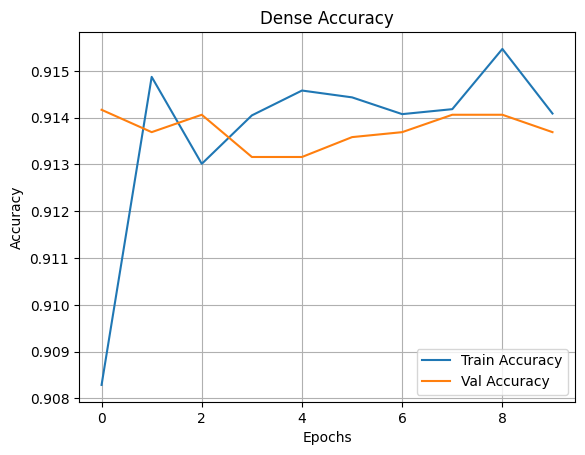

In [59]:
model_dense = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model_dense.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_dense = model_dense.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])
plot_accuracy(history_dense, "Dense")

In [60]:
#MODEL 2: Bidirectional LSTM

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8961 - loss: 0.2650 - val_accuracy: 0.9102 - val_loss: 0.1494
Epoch 2/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9119 - loss: 0.1481 - val_accuracy: 0.9132 - val_loss: 0.1452
Epoch 3/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9123 - loss: 0.1464 - val_accuracy: 0.9137 - val_loss: 0.1439
Epoch 4/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9125 - loss: 0.1448 - val_accuracy: 0.9143 - val_loss: 0.1437
Epoch 5/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9133 - loss: 0.1439 - val_accuracy: 0.9129 - val_loss: 0.1438
Epoch 6/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9151 - loss: 0.1433 - val_accuracy: 0.9135 - val_loss: 0.1438
Epoch 7/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9135 - loss: 0.1450 - val_accuracy: 0.9137 - val_loss: 0.1441


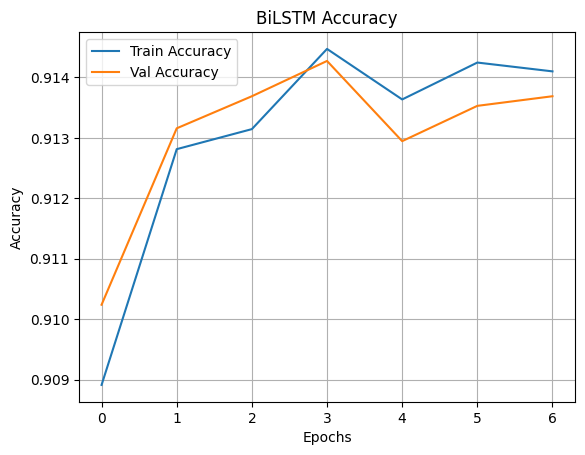

In [61]:
# Reshape for LSTM input
X_train_seq = X_train.reshape(X_train.shape[0], 1, 100)
X_test_seq = X_test.reshape(X_test.shape[0], 1, 100)

model_bilstm = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(1, 100)),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model_bilstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_bilstm = model_bilstm.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test), callbacks=[EarlyStopping(patience=3)])
plot_accuracy(history_bilstm, "BiLSTM")

In [62]:
#MODEL 3: Conv1D + Pooling

In [63]:
# Reshape: (samples, 1, 100) → (samples, 100, 100)
X_train_conv = np.repeat(X_train_seq, 100, axis=1)
X_test_conv = np.repeat(X_test_seq, 100, axis=1)

print("New shape for Conv1D:", X_train_conv.shape)

New shape for Conv1D: (75356, 100, 100)


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model_conv1d = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 100)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model_conv1d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_conv1d = model_conv1d.fit(
    X_train_conv, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_conv, y_test),
    callbacks=[EarlyStopping(patience=3)]
)

Epoch 1/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9042 - loss: 0.1750 - val_accuracy: 0.9137 - val_loss: 0.1443
Epoch 2/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9132 - loss: 0.1455 - val_accuracy: 0.9137 - val_loss: 0.1442
Epoch 3/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9143 - loss: 0.1433 - val_accuracy: 0.9137 - val_loss: 0.1436
Epoch 4/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9131 - loss: 0.1438 - val_accuracy: 0.9108 - val_loss: 0.1456
Epoch 5/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9151 - loss: 0.1435 - val_accuracy: 0.9137 - val_loss: 0.1438
Epoch 6/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9151 - loss: 0.1435 - val_accuracy: 0.9137 - val_loss: 0.1436


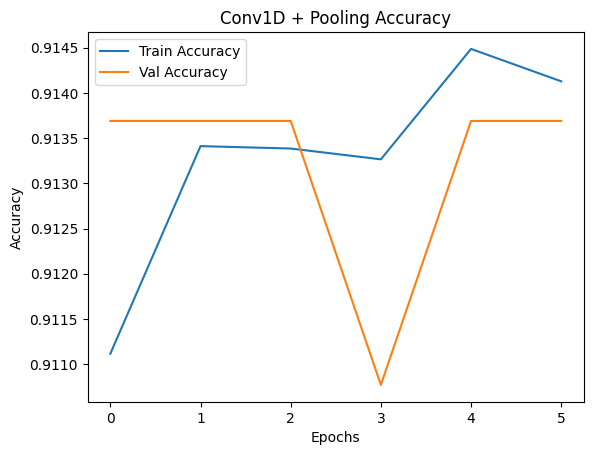

In [66]:
def plot_accuracy(history, title):
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(title + " Accuracy")
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

plot_accuracy(history_conv1d, "Conv1D + Pooling")

In [67]:
#MODEL 4: GRU

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2355/2355 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8935 - loss: 0.2733 - val_accuracy: 0.9126 - val_loss: 0.1455
Epoch 2/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9115 - loss: 0.1500 - val_accuracy: 0.9141 - val_loss: 0.1455
Epoch 3/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9127 - loss: 0.1457 - val_accuracy: 0.9056 - val_loss: 0.1472
Epoch 4/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9156 - loss: 0.1453 - val_accuracy: 0.9137 - val_loss: 0.1439
Epoch 5/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9127 - loss: 0.1438 - val_accuracy: 0.9137 - val_loss: 0.1442
Epoch 6/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9143 - loss: 0.1448 - val_accuracy: 0.9141 - val_loss: 0.1438
Epoch 7/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9158 - loss: 0.1409 - val_accuracy: 0.9137 - val_loss: 0.1436
Epoch 8/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9141 - loss: 0.1443 - val

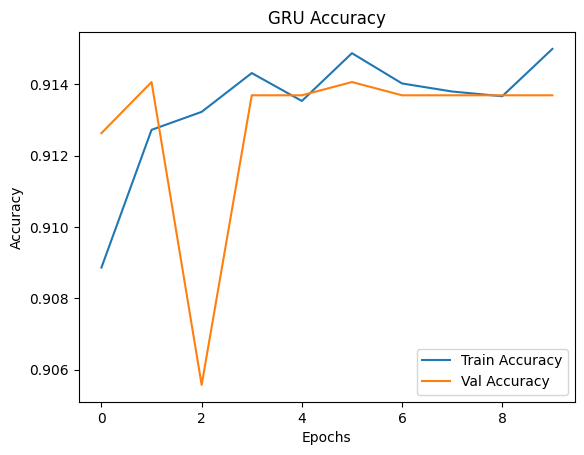

In [68]:
from tensorflow.keras.layers import GRU
import joblib # Import joblib

model_gru = Sequential([
    GRU(64, input_shape=(1, 100)),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_gru = model_gru.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test), callbacks=[EarlyStopping(patience=3)])
plot_accuracy(history_gru, "GRU")

# Save the trained model and tfidf vectorizer
model_gru.save("model_gru.h5")
joblib.dump(tfidf, "tfidf.pkl")
joblib.dump(label_encoder, "label_encoder.pkl") # Save the label_encoder
np.save("class_labels.npy", label_encoder.classes_)

In [69]:
# ========================================
# AI DEBATE SIMULATOR (COLAB VERSION)
# ========================================
import numpy as np
import pandas as pd
import tensorflow as tf
import joblib
import random

# Load your trained GRU model and TF-IDF
model = tf.keras.models.load_model("model_gru.h5")
tfidf = joblib.load("tfidf.pkl")
classes = np.load("class_labels.npy", allow_pickle=True)

# Engagement score range (based on your dataset)
ENG_MIN, ENG_MAX = 300, 1500

# ===============================
# Function: Topic & Subtopic Map
# ===============================
topics = {
    "Existence of God": ["Theist vs Atheist"],
    "Religion": ["Hindu vs Islam", "Islam vs Christian", "Christian vs Hindu"],
    "Politics": ["BJP vs Congress", "AAP vs BJP", "Congress vs AAP"],
    "Social Issues": ["Men vs Women Equality", "Rich vs Poor", "Freedom vs Censorship"]
}

def select_topic():
    print("Choose Main Topic:")
    for i, t in enumerate(topics.keys()):
        print(f"{i+1}. {t}")
    main_choice = int(input("Enter your choice number: ")) - 1
    main_topic = list(topics.keys())[main_choice]
    print(f"\nSelected: {main_topic}")
    print("Choose Subtopic:")
    for j, sub in enumerate(topics[main_topic]):
        print(f"{j+1}. {sub}")
    sub_choice = int(input("Enter your choice number: ")) - 1
    subtopic = topics[main_topic][sub_choice]
    print(f"\nSubtopic Selected: {subtopic}")
    return main_topic, subtopic

# ==========================================
# Function: Model Prediction & Round Scoring
# ==========================================
def predict_confidence(sentence):
    X = tfidf.transform([sentence]).todense()  # Convert sparse to dense
    # Ensure X is at least 2D and slice
    X = np.asarray(X)[:, :100]
    # Expand dimensions to match expected model input shape (samples, timesteps, features)
    X = np.expand_dims(X, 1)
    prob = model.predict(X)[0]
    confidence = np.max(prob)
    return confidence

def get_score(sentence):
    conf = predict_confidence(sentence)
    engagement = random.randint(ENG_MIN, ENG_MAX)
    score = round((conf * (engagement / ENG_MAX)) * 10, 2)
    return score, conf, engagement

# ============================
# MAIN DEBATE LOOP
# ============================
def start_debate():
    main_topic, subtopic = select_topic()
    groups = subtopic.split(" vs ")
    groupA, groupB = groups[0], groups[1]

    print(f"\nDebate Starting on: {main_topic} → {subtopic}")
    print(f"Group A: {groupA} | Group B: {groupB}")
    print("Default: 5 rounds (you can continue till 20)\n")

    scoreA = scoreB = 0
    round_no = 1
    while True:
        print(f"\n🗣️ Round {round_no}")
        a_input = input(f"{groupA} says: ")
        b_input = input(f"{groupB} says: ")

        a_score, a_conf, a_eng = get_score(a_input)
        b_score, b_conf, b_eng = get_score(b_input)

        print(f"{groupA} → Conf: {a_conf:.2f}, Engagement: {a_eng}, Score: {a_score}/10")
        print(f"{groupB} → Conf: {b_conf:.2f}, Engagement: {b_eng}, Score: {b_score}/10")

        if a_score > b_score:
            print(f"🏆 {groupA} wins Round {round_no}")
            scoreA += 1
        elif b_score > a_score:
            print(f"🏆 {groupB} wins Round {round_no}")
            scoreB += 1
        else:
            print("🤝 Draw")

        if round_no >= 5:
            print(f"\nAfter {round_no} rounds → {groupA}: {scoreA} | {groupB}: {scoreB}")
            choice = input("Continue next round? (yes/no): ").lower()
            if choice == "no" or round_no == 20:
                break
        round_no += 1

    print("\n============== FINAL RESULTS ==============")
    print(f"{groupA} Total Wins: {scoreA}")
    print(f"{groupB} Total Wins: {scoreB}")
    if scoreA > scoreB:
        print(f"🏆 FINAL WINNER: {groupA}")
    elif scoreB > a_score:
        print(f"🏆 FINAL WINNER: {groupB}")
    else:
        print("🤝 FINAL RESULT: Draw")

# ==========================================
# RUN DEBATE
# ==========================================
start_debate()

Choose Main Topic:
1. Existence of God
2. Religion
3. Politics
4. Social Issues
Enter your choice number: 1

Selected: Existence of God
Choose Subtopic:
1. Theist vs Atheist
Enter your choice number: 1

Subtopic Selected: Theist vs Atheist

Debate Starting on: Existence of God → Theist vs Atheist
Group A: Theist | Group B: Atheist
Default: 5 rounds (you can continue till 20)


🗣️ Round 1
Theist says: God is everywhere
Atheist says: No
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Theist → Conf: 0.75, Engagement: 580, Score: 2.890000104904175/10
Atheist → Conf: 0.44, Engagement: 881, Score: 2.569999933242798/10
🏆 Theist wins Round 1

🗣️ Round 2
Theist says: Yes
Atheist says: No
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Theist → Conf: 0.44, Engagement: 414, Score: 1.2100000381469727/10
Atheist → Conf: 0.44, Engagement: 576, Score: 1.6799999475479126/10
🏆 Atheist wins Round 2

🗣️ Round 3
Theist says: I saw
Atheist says: I am

In [70]:
import joblib
import numpy as np

joblib.dump(tfidf, "tfidf.pkl")                  # ✅ Save vectorizer correctly
joblib.dump(label_encoder, "label_encoder.pkl")  # ✅ Save encoder correctly
np.save("class_labels.npy", label_encoder.classes_)
model_gru.save("model_gru.h5")


In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import numpy as np

# 💡 Train GRU model (use your dataset here)
model_gru = Sequential([
    GRU(64, input_shape=(1, 100)),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_gru.fit(
    X_train_seq, y_train,
    validation_data=(X_test_seq, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[EarlyStopping(patience=3)]
)

model_gru.save("model_gru.h5")

# ✅ SAVE FILES USING JOBLIB (not pickle)
joblib.dump(tfidf, "tfidf.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
np.save("class_labels.npy", label_encoder.classes_)

print("✅ FILES SAVED SUCCESSFULLY")


Epoch 1/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8928 - loss: 0.2683 - val_accuracy: 0.9122 - val_loss: 0.1462
Epoch 2/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9108 - loss: 0.1515 - val_accuracy: 0.9141 - val_loss: 0.1442
Epoch 3/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9133 - loss: 0.1455 - val_accuracy: 0.9133 - val_loss: 0.1442
Epoch 4/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9146 - loss: 0.1438 - val_accuracy: 0.9136 - val_loss: 0.1442
Epoch 5/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9133 - loss: 0.1446 - val_accuracy: 0.9137 - val_loss: 0.1439
Epoch 6/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9143 - loss: 0.1450 - val_accuracy: 0.9137 - val_loss: 0.1443
Epoch 7/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9159 - loss: 0.1433 - val_accuracy: 0.9137 - val_loss: 0.1437
Epoch 8/10
2355/2355 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9146 - loss: 0

✅ FILES SAVED SUCCESSFULLY


In [72]:
from google.colab import files
files.download("model_gru.h5")
files.download("tfidf.pkl")
files.download("label_encoder.pkl")
files.download("class_labels.npy")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
!python --version

Python 3.12.12


In [74]:
#hello

In [74]:
with open("tfidf.pkl", "wb") as f:
    pickle.dump(tfidf, f)
